In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
dataframe = pd.read_csv("LD2011_2014.txt", delimiter = ';')

C:\Users\shumi\AppData\Local\Temp\ipykernel_37568\888451614.py:1: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,125,126,127,128,129,130,131,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,157,160,164,165,167,170,173,177,178,179,181,184,185,186,223,224,255,280,289,305,308,322,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,363,364,365,366,367,368,369,370) have mixed types. Specify dtype option on import or set low_memory=False.
  dataframe = pd.read_csv("LD2011_2014.txt", delimiter = ';')


In [3]:
'''
dataframe = pd.read_csv("LD2011_2014.txt", delimiter = ';')
'''

'\ndataframe = pd.read_csv("LD2011_2014.txt", delimiter = \';\')\n'

# Data Preprocessing

In [4]:
# Accumulate consumption data to identify different types of clients
month_consumption = dict()
client_num = 370

for index, row in dataframe.iterrows():
    month = row['Unnamed: 0'].split(" ")[0][:7]
    '''if date not in day_consumption.keys():
        client_day = [0] * client_num
        day_consumption[date] = client_day'''
    if month not in month_consumption.keys():
        client_month = [0] * client_num
        month_consumption[month] = client_month
    
    for i in range(1, client_num + 1):
        value = row[i]
        if type(value) == type("a"):
            value = float(value.replace(",", "."))
        month_consumption[month][i - 1] += value


In [5]:
# plot clients' monthly consumption for classification
def plot_consumption(x, y, title):
    for xe, ye in zip(x, y):
        plt.scatter([xe] * len(ye), ye, alpha = 0.7)
    plt.xlabel("Months")
    plt.ylabel("Amount of Electricty Consumption")
    plt.title(title)
    plt.tight_layout()
    plt.show()

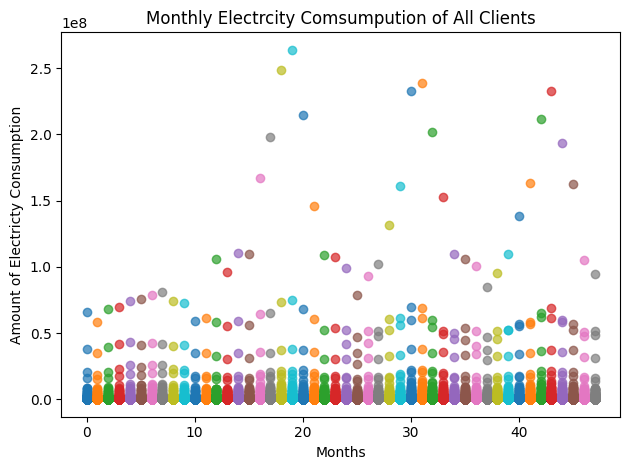

In [6]:
plot_consumption(range(48), month_consumption.values(), "Monthly Electrcity Comsumpution of All Clients")

In [7]:
for i in month_consumption.keys():
    print("Number of 0 in {} is {}".format(i, month_consumption[i].count(0)))

Number of 0 in 2011-01 is 212
Number of 0 in 2011-02 is 211
Number of 0 in 2011-03 is 211
Number of 0 in 2011-04 is 210
Number of 0 in 2011-05 is 210
Number of 0 in 2011-06 is 210
Number of 0 in 2011-07 is 210
Number of 0 in 2011-08 is 210
Number of 0 in 2011-09 is 210
Number of 0 in 2011-10 is 210
Number of 0 in 2011-11 is 210
Number of 0 in 2011-12 is 210
Number of 0 in 2012-01 is 49
Number of 0 in 2012-02 is 49
Number of 0 in 2012-03 is 47
Number of 0 in 2012-04 is 48
Number of 0 in 2012-05 is 47
Number of 0 in 2012-06 is 46
Number of 0 in 2012-07 is 42
Number of 0 in 2012-08 is 40
Number of 0 in 2012-09 is 41
Number of 0 in 2012-10 is 41
Number of 0 in 2012-11 is 38
Number of 0 in 2012-12 is 38
Number of 0 in 2013-01 is 35
Number of 0 in 2013-02 is 34
Number of 0 in 2013-03 is 34
Number of 0 in 2013-04 is 34
Number of 0 in 2013-05 is 33
Number of 0 in 2013-06 is 30
Number of 0 in 2013-07 is 30
Number of 0 in 2013-08 is 28
Number of 0 in 2013-09 is 26
Number of 0 in 2013-10 is 25
Nu

**We observed that the data from year 2011 has many 0**

In [7]:
# Drop the data from 2011, and 2015-01
for i in range(1,13):
    month = "2011-" + (str(i) if i >= 10 else ("0" + str(i)))
    if month in month_consumption.keys():
        del month_consumption[month]
if "2015-01" in month_consumption.keys():
    del month_consumption["2015-01"]

In [9]:
# Drop clients with any month from 2012-01 till 2014-12 has at least one 0, or has at least one usage greater than 0.028 * 1*10^8 Kwh, which means the bottom 275 users
x = set()
for i in month_consumption.keys():
    index = set([j for j in range(len(month_consumption[i])) if (month_consumption[i][j] == 0 or month_consumption[i][j] > 0.028*10**8)])
    x = x.union(index)

print("Num of clients excluded is {}".format(len(x)))
clients = list(set(range(370)) - x)
print("Num of clients remains is {}".format(len(clients)))

Num of clients excluded is 95
Num of clients remains is 275


In [10]:
import random

random.seed(1)
random.shuffle(clients)
train_index = clients[:220][:176]
validation_index = clients[:220][176:]
test_index = clients[220:]
print("Size of train set is {}".format(len(train_index)))
print("Size of validation set is {}".format(len(validation_index)))
print("Size of test set is {}".format(len(test_index)))

Size of train set is 176
Size of validation set is 44
Size of test set is 55


**The ratio is: (Train+Validation)/Test = 4/1, Train/Validation = 4/1**

In [11]:
# New Dataframe on clients
client_monthly_train = pd.DataFrame({"Month": month_consumption.keys()})
client_monthly_validation = pd.DataFrame({"Month": month_consumption.keys()})
client_monthly_test = pd.DataFrame({"Month": month_consumption.keys()})

for i in range(client_num):
    # Exclude the 61
    if i in x:
        continue
    monthly_col = []
    for value in month_consumption.values():
        monthly_col.append(value[i])
    col_name = "Client_" + str(i + 1)
    monthly_data = pd.DataFrame({col_name: monthly_col})
    if i in train_index:
        client_monthly_train = pd.concat([client_monthly_train, monthly_data], axis=1)
    elif i in validation_index:
        client_monthly_validation = pd.concat([client_monthly_validation, monthly_data], axis=1)
    else:
        client_monthly_test = pd.concat([client_monthly_test, monthly_data], axis=1)

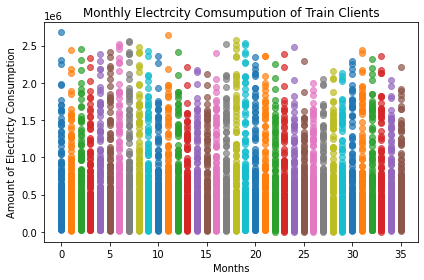

In [12]:
plot_consumption(range(36), [client_monthly_train.iloc[i].values[1:] for i in range(36)], "Monthly Electrcity Comsumpution of Train Clients")

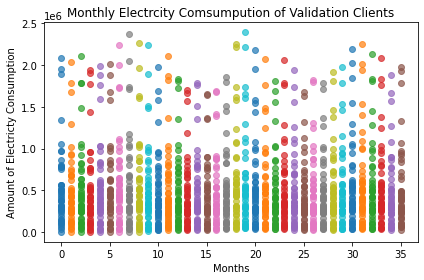

In [13]:
plot_consumption(range(36), [client_monthly_validation.iloc[i].values[1:] for i in range(36)], "Monthly Electrcity Comsumpution of Validation Clients")

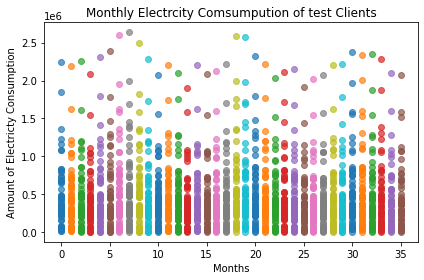

In [14]:
plot_consumption(range(36), [client_monthly_test.iloc[i].values[1:] for i in range(36)], "Monthly Electrcity Comsumpution of test Clients")

Text(0.5, 0, 'Months')

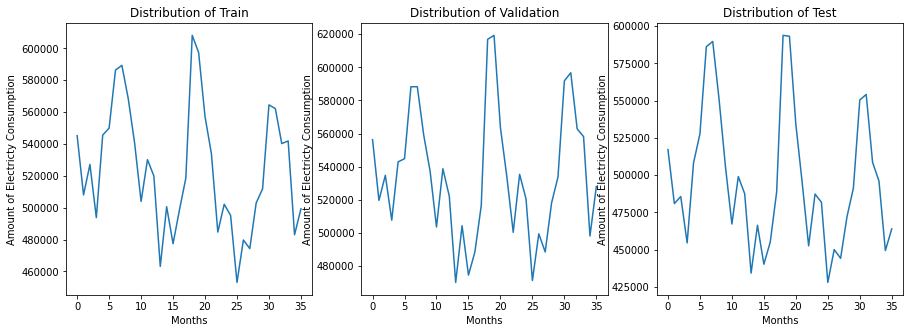

In [15]:
import numpy as np

train_avg = [np.mean(client_monthly_train.iloc[i].values[1:]) for i in range(36)]
validation_avg = [np.mean(client_monthly_validation.iloc[i].values[1:]) for i in range(36)]
test_avg = [np.mean(client_monthly_test.iloc[i].values[1:]) for i in range(36)]

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].plot(train_avg)
axes[0].set_title("Distribution of Train")
axes[0].set_ylabel("Amount of Electricty Consumption")
axes[0].set_xlabel("Months")
axes[1].plot(validation_avg)
axes[1].set_title("Distribution of Validation")
axes[1].set_ylabel("Amount of Electricty Consumption")
axes[1].set_xlabel("Months")
axes[2].plot(test_avg)
axes[2].set_title("Distribution of Test")
axes[2].set_ylabel("Amount of Electricty Consumption")
axes[2].set_xlabel("Months")

# Stationarity Analysis

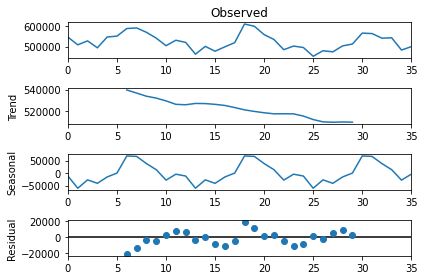

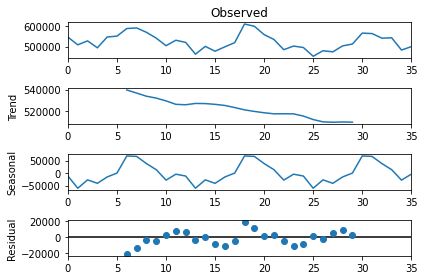

In [16]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(train_avg, model='additive', period = 12)
decomposition.plot()

**From the decomposition graph we can see there's an obvious Trend and Seasonality**

In [17]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import kpss

kpss_results = kpss(train_avg, regression="ct")
print("Test statistics: {}".format(kpss_results[0]))
print("P_values: {}".format(kpss_results[1]))
print("Critical values: {}".format(kpss_results[-1]))

Test statistics: 0.2566474967952808
P_values: 0.01
Critical values: {'10%': 0.119, '5%': 0.146, '2.5%': 0.176, '1%': 0.216}


/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/stattools.py:1875: FutureWarning: The behavior of using nlags=None will change in release 0.13.Currently nlags=None is the same as nlags="legacy", and so a sample-size lag length is used. After the next release, the default will change to be the same as nlags="auto" which uses an automatic lag length selection method. To silence this warning, either use "auto" or "legacy"
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/stattools.py:1906: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


**From the result of KPSS test, we obtained an extremely small P-value, which reject the null hypothesis, and conclude that there's no evidence to show the time series data is stationary.**

# Model Training

In [24]:
def mape(actual, forecast):
    total = 0
    for i in range(len(actual)):
        total += np.abs((actual[i]-forecast[i])/actual[i])
    return total*100/len(actual)

In [25]:
# Apply SARIMAX on train_avg
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Hyper-parameter Tuning
p_val, d_val, q_val = [0,1,2], [0,1,2], [0,1,2]
pdq_val = []
mape_val = []
for p in p_val:
    for d in d_val:
        for q in q_val:
            sarimax_model = SARIMAX(train_avg, order=[p,d,q], trend="t")
            results = sarimax_model.fit()
            forecast_values = results.predict(start=1, end=len(validation_avg))
            pdq_val.append([p, d, q])
            mape_val.append(mape(validation_avg, forecast_values))

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.8/dist-packages/statsmodels/base/model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [26]:
index = mape_val.index(min(mape_val))
best_p, best_d, best_q = pdq_val[index][0], pdq_val[index][1], pdq_val[index][2]
print("Best Hyper-parameters on Validation set are:")
print("(p, d, q)=({}, {}, {})".format(best_p, best_d, best_q))
print("MAPE on Validation set is {}".format(mape_val[index]))

Best Hyper-parameters on Validation set are:
(p, d, q)=(1, 0, 0)
MAPE on Validation set is 2.292125299966548


**Now we build the best model and predict test set**

In [28]:
sarimax_model = SARIMAX(train_avg, order=[best_p,best_d,best_q], trend="t")
results = sarimax_model.fit()
forecast_values = results.predict(start=1, end=len(test_avg))

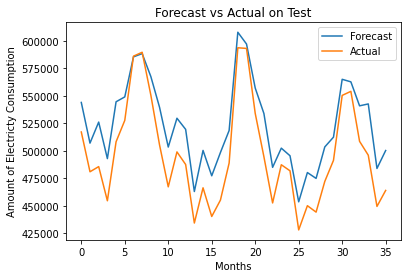

In [29]:
plt.plot(forecast_values, label="Forecast")
plt.plot(test_avg, label="Actual")
plt.ylabel("Amount of Electricty Consumption")
plt.xlabel("Months")
plt.title("Forecast vs Actual on Test")
plt.legend()

In [30]:
print("Mean absolute percentage error for SARIMAX model on Test set is: {}".format(mape(test_avg, forecast_values)))

Mean absolute percentage error for SARIMAX model on Test set is: 5.601498351932532


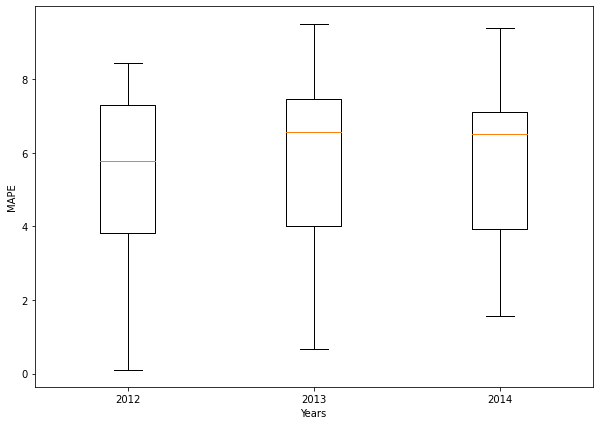

In [35]:
ape_2012 = [100*np.abs((test_avg[i]-forecast_values[i])/test_avg[i]) for i in range(12)]
ape_2013 = [100*np.abs((test_avg[i]-forecast_values[i])/test_avg[i]) for i in range(12, 24)]
ape_2014 = [100*np.abs((test_avg[i]-forecast_values[i])/test_avg[i]) for i in range(24, 36)]

fig= plt.figure(figsize =(10, 7))
 
# Creating plot
plt.boxplot([ape_2012, ape_2013, ape_2014], labels = ["2012", "2013", "2014"])
plt.xlabel("Years")
plt.ylabel("MAPE")
 
# show plot
plt.show()